# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [195]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib as plt
from collections import Counter

## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [196]:
# Apertura archivo json
with open('../data/allcandidatenewssample.json') as f:
  # Carga del archivo jason en variable
  candidatenews = json.load(f)

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [197]:
# Cantidad de elementos(diccionarios) de la lista
len(candidatenews)

60000

### Utiliza pprint para mostrar los dos primeros diccionarios:

In [198]:
# Módulo 'pprint'(Pretty Print) y función 'pprint' para imprimir estructura de datos complejas
# Slicing([0:2]) para mostrar los dos primeros elementos
pprint.pprint(candidatenews[0:2])

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'}]


### Obtenga el valor de la clave de origen para el primer elemento de la lista:

In [199]:
# Extracción de la clave 'source' del primero elemento([0]) 
pprint.pprint(candidatenews[0]['source'])

'NBC News'


## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

In [200]:
# Cuantificación de las claves por número de elementos de la lista
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

In [201]:
# Impresión del primer elemento('next') que tenga menos de '9' claves
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


In [202]:
# # Impresión del primer elemento('next') que tenga más de '9' claves
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


In [203]:
# # Impresión de los primeros 10 elementos'[0:10]' que tenga '2' claves
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

In [204]:
# Cantidad de elementos que tienen más de '2' claves
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

In [205]:
# Recogida en lista de los elementos que tienen 'Politico' como clave 'source' 
politico = [item for item in candidatenews if item.get("source") == "Politico"]
# Cantidad de elementos en la lista 'politico'
len(politico)

2732

In [206]:
# Visualización de los dos primeros elementos('[0:2]') de la lista 'politico'
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

In [207]:
# Recogida en lista del contendido de la clave 'source', si la tienen, de los elementos de la lista
sources = [item.get('source') for item in candidatenews if 'source' in item]
# Tipo de variable 'sources'
type(sources)

list

In [208]:
# Cantidad de elementos de la lista 'sources'
len(sources)

57618

In [209]:
# Visuadlización de los 5 primeros elementos('[0:5]') de la lista 'source'
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

In [210]:
# Visualización de los '10' elementos que contienen las claves 'source' de mayor frecuencia
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

In [211]:
# Bucle para recorrer la lista de diccionarios 'candidatenews'
for newsdict in candidatenews:
    # Actualización de los elementos que tienen como clave 'source' y contenido 'TheHill'
    # para sobreescribirlo como 'The Hill'
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
# Lista que recoge la clave 'source' de los elementos de la lista actualizada
sources = [item.get('source') for item in candidatenews]
# Visualización de los '10' elementos que contienen las claves 'source' de mayor frecuencia
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

In [212]:
#df = pd.read_json('../data/allcandidatenewssample.json')
df = pd.DataFrame(candidatenews)
df

,title,url,source,time,date,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


### 2- Convierta la columna date a un tipo de datos datetime:

In [213]:
# Conversión columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])
# Visualización de los primeros 3 registros para verificar la conversión
df.head(3)

,title,url,source,time,date,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN


### 3- Cambiar el nombre de la columna `date` por `storydate`:

In [214]:
df = df.rename(columns={
    'date': 'storydate'
})
df.head(2)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN


### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

In [215]:
df['storydate'] = pd.to_datetime(df['storydate'])

### 5- Nuestre los tipos de datos

In [216]:
print(df.dtypes)

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object


### 6- Dimensiones del dataframe (shape)

In [217]:
df.shape

(57618, 10)

### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame `candidatenewsdf` con pandas, junto con el número de veces que cada fuente aparece.

In [218]:
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


### 8- Mostrar las primeras 5 filas del DataFrame

In [219]:
# Obtener las 10 fuentes más comunes
top_10_sources = df['source'].value_counts().head(10)

# Mostrar el resultado
top_10_sources

source
The Hill               3725
Fox News               3530
CNN.com                2750
Politico               2732
The New York Times     1804
Washington Post        1770
Washington Examiner    1655
New York Post          1275
Vox                     941
Breitbart               799
Name: count, dtype: int64

### 9- Mostrar las ultimas 15 lineas del dataframe

In [220]:
last_15_lines = df.tail(15)
last_15_lines

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
57603,Michael Bennet to open fundraisers to press,https://www.politico.com/news/2019/12/19/benne...,Politico,10 hours ago,2019-12-20 04:00:00,Michael Bennet,1,1,www.politico.com,NaN
57604,Paul Tudor Jones: Trump is 'the greatest sales...,https://finance.yahoo.com/news/paul-tudor-jone...,Yahoo Finance,26 mins ago,2019-11-06 10:00:00,Donald Trump,4,1,finance.yahoo.com,NaN
57605,"What ""The West Wing"" reveals about Joe Biden",https://www.cnn.com/2019/06/15/opinions/joe-bi...,CNN.com,3 hours ago,2019-06-15 18:00:00,Joe Biden,1,1,www.cnn.com,NaN
57606,"Delaney: ""I'm planning on staying in""",https://www.msnbc.com/david-gura/watch/delaney...,MSNBC.com,3 days ago,2019-08-28 14:00:00,John Delaney,9,1,www.msnbc.com,NaN
57607,Sen. Kamala Harris introduces bill to lengthen...,https://www.cnbc.com/2019/11/06/sen-kamala-har...,CNBC.com,48 mins ago,2019-11-06 14:00:00,Kamala Harris,3,1,www.cnbc.com,NaN
57608,Wayne Messam: Money Kept Me Out of the First D...,http://fortune.com/2019/06/25/wayne-messam-dem...,Fortune,3 days ago,2019-06-29 04:00:00,Wayne Messam,5,1,fortune.com,NaN
57609,Billionaire Tom Steyer raises $2 million for W...,https://www.winchesterstar.com/associated_pres...,The Winchester Star,19 hours ago,2019-10-11 10:00:00,Tom Steyer,6,1,www.winchesterstar.com,NaN
57610,"Ilhan Omar, Kamala Harris Respond To “Send Her...",https://deadline.com/2019/07/ilhan-omar-politi...,Deadline,14 hours ago,2019-07-18 14:00:00,Kamala Harris,2,1,deadline.com,NaN
57611,Kamala Harris Attended LA Fundraisers The Same...,https://www.thedailybeast.com/kamala-harris-at...,The Daily Beast,18 hours ago,2019-08-31 10:00:00,Kamala Harris,4,1,www.thedailybeast.com,NaN
57612,Northern Iowa voters tell presidential candida...,https://www.desmoinesregister.com/story/news/e...,Des Moines Register,2 hours ago,2019-11-26 22:00:00,Amy Klobuchar,3,1,www.desmoinesregister.com,NaN


### 10- Filtrar los artículos donde la fuente (source) es "Politico"

In [221]:
# Creación de un dataframe filtrado 
df_politico = df[df['source'] == "Politico"]
# Mostrar el DataFrame filtrado
print(df_politico)

                                                   title  \
22     Marianne Williamson reaches donor threshold fo...   
95      O'Rourke and Castro on collision course in Texas   
208    Democrats try out their Spanish on TV as they ...   
224            Pennsylvania suburbs revolt against Trump   
234    Beto O'Rourke in talks with strategists ahead ...   
...                                                  ...   
57384  This Republican Is Running Against Donald Trum...   
57388  Steve Bullock: Trump reelection 'more likely w...   
57550  Democrat Bennet sounds caution on impeachment ...   
57551  Marianne Williamson qualifies for 2020 Democra...   
57603        Michael Bennet to open fundraisers to press   

                                                     url    source  \
22     https://www.politico.com/story/2019/05/09/mari...  Politico   
95     https://www.politico.com/story/2018/12/27/orou...  Politico   
208    https://www.politico.com/story/2019/06/25/demo...  Politico   

### 11- Filtrar los artículos publicados después del 1 de enero de 2020

In [222]:
after_1_january_2020 = df[df['storydate'] > '2020-01-01']
after_1_january_2020

,title,url,source,time,storydate,query,story_position,panel_position,domain,category


### 12- Filtrar y mostrar los artículos de "CNN.com"

In [223]:
df_cnn = df[df['source'] == "CNN.com"]
# Mostrar el DataFrame filtrado
print(df_cnn)

                                                   title  \
16     Bernie Sanders stays on the stump after receiv...   
17     Trump says he spoke with Putin about 'Russian ...   
30     McConnell will move to acquit Trump if he's im...   
61     Here's what Sanford said about voting for Trum...   
103    First on CNN: Respected foreign policy veteran...   
...                                                  ...   
57544  Joe Biden tops Democratic field with $6.3 mill...   
57560        Trump in 'very good health,' physician says   
57578  Pete Buttigieg's minority problem isn't just a...   
57598  Biden camp responds after Giuliani's canceled ...   
57605       What "The West Wing" reveals about Joe Biden   

                                                     url   source  \
16     https://www.cnn.com/2019/03/15/politics/bernie...  CNN.com   
17     https://www.cnn.com/2019/05/03/politics/trump-...  CNN.com   
30     https://www.cnn.com/2019/12/11/politics/mcconn...  CNN.com   
61 

### 13- Contar los valores nulos en cada columna

In [224]:
null_values = df.isnull().sum()
# Mostrar la cantidad de valores nulos por columna
null_values

title                 0
url                   0
source                0
time                  0
storydate             0
query                 0
story_position        0
panel_position        0
domain                0
category          57202
dtype: int64

### 14- Eliminar filas con valores nulos en la columna "title"

In [225]:
df_notnull_title = df.dropna(subset=['title'])
# Mostrar el DataFrame sin filas con valores nulos en la columna 'title'
print(df_notnull_title)

                                                   title  \
0      Bloomberg cuts ties with company using prison ...   
1      Democratic Candidates React to Michael Bloombe...   
2      Sanders responds to de Blasio's invitation to ...   
3      From Andrew Yang's 'No Tie' look to Bernie Buc...   
4      Liberal billionaire Tom Steyer scolds Dems for...   
...                                                  ...   
57613  NH Primary Source: Cory Booker's presidential ...   
57614       John Delaney Creates His Own Campaign Bounce   
57615  Mayor de Blasio calls for charges against driv...   
57616  Elizabeth Warren Narrows Joe Biden Lead Among ...   
57617  Kamala Harris demands answers on California pr...   

                                                     url  \
0      https://www.nbcnews.com/politics/2020-election...   
1      https://www.townandcountrymag.com/society/poli...   
2      https://thehill.com/homenews/campaign/456579-s...   
3      https://www.cnbc.com/2019/08/02/

### 15- Rellenar valores nulos en la columna "category" con "Unknown"

In [226]:
df['category'] = df['category'].fillna('Unknown')
#df_filled = df.fillna(df['category'] == 'Unknown')
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,Unknown


### 16- Convertir la columna "panel_position" a tipo float

In [227]:
# Convertimos los valores de la columna 'panel_position' a float, y los 'None' o cadenas a 'NaN'
df['panel_position'] = pd.to_numeric(df['panel_position'], errors='coerce')
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown


### 17- Convertir la columna "storydate" a tipo string

In [228]:
df['storydate'] = df['storydate'].astype(str)
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown


### 18- Obtener la media de "story_position"

In [229]:
story_position_main = round(df['story_position'].mean(), 3)
print(f"Media de la columna 'story_position': {story_position_main}")

Media de la columna 'story_position': 5.25


### 19- Obtener la desviación estándar de "story_position"

In [230]:
story_position_std = round(df['story_position'].std(), 3)
print(f"Desviación Estándar de la columna 'story_position': {story_position_std}")

Desviación Estándar de la columna 'story_position': 2.889


### 20- Obtener la cantidad de artículos por fuente (source)

In [231]:
source_art = df['source'].value_counts()
print(f"Número artículos por {source_art}")

Número artículos por source
The Hill                    3725
Fox News                    3530
CNN.com                     2750
Politico                    2732
The New York Times          1804
                            ... 
Power Line                     1
Nevada Business Magazine       1
Washington Times Herald        1
WNDU 16                        1
WPVI                           1
Name: count, Length: 1723, dtype: int64


### 21- Obtener el valor mínimo y máximo de "story_position"

In [232]:
story_position_min = df['story_position'].min()
print(f"Valor MÍNIMO de 'story_position': {story_position_min}")

Valor MÍNIMO de 'story_position': 1


In [233]:
story_position_max = df['story_position'].max()
print(f"Valor MÁXIMO de 'story_position': {story_position_max}")

Valor MÁXIMO de 'story_position': 10


### 22- Agrupar por la columna "source" y contar el número de artículos

In [234]:
# Recogida del número de artículos agrupados por columna 'source'
articles_by_source = df.groupby('source').size()
# Visualización de la Serie
print(articles_by_source)

source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1723, dtype: int64


### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [235]:
# DataFrame que recoge una tabla dinámica 
# con la media('mean') de posición('story_position') de los artículos por fuente('source')
pivot_table = df.pivot_table(values='story_position', index='source', aggfunc='mean')
# Visualización por pantalla de los primeros registros
print(pivot_table.head())
#pivot_table.head()

                       story_position
source                               
                                 4.50
+972 Magazine                    7.00
1010 Wins - Radio.com            7.52
1011 News                        2.00
1011Now                          2.00


### 24- Agrupar por "storydate" y contar el número de artículos por día

In [236]:
# Recogida en una Serie del número de artículos agrupados por fecha('storydate')
articles_by_date = df.groupby('storydate').size()
# Visualización por pantalla de los 10 primeros registros
print(articles_by_date.head(10))

storydate
2018-12-16 00:00:00    20
2018-12-16 06:00:00    21
2018-12-16 12:00:00    15
2018-12-16 18:00:00    18
2018-12-17 00:00:00    16
2018-12-17 06:00:00    15
2018-12-17 12:00:00    18
2018-12-17 18:00:00    17
2018-12-18 00:00:00    24
2018-12-18 06:00:00    15
dtype: int64


### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

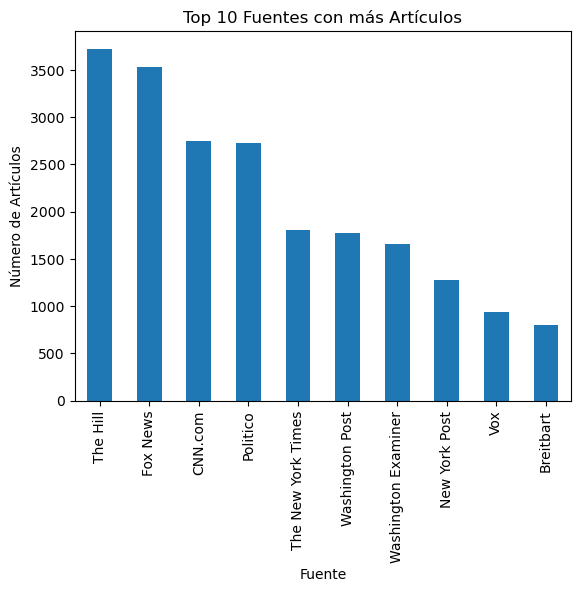

In [237]:
# Importación módulo.función
import matplotlib.pyplot as plt
# Recogida  en una Serie de los '10' valores más repetidos en la columna 'source'
top_sources = df['source'].value_counts().head(10)
# Creación de un 'plot' de tipo barra(gráfico de barras) a partir de una Serie
top_sources.plot(kind='bar')
# Creación y definición de título al plot
plt.title('Top 10 Fuentes con más Artículos')
# Creación y definición de etiqueta al eje X
plt.xlabel('Fuente')
# Creación y definición de etiqueta al eje Y
plt.ylabel('Número de Artículos')
# Visualización por pantalla del plot
plt.show()

### 26- Graficar la distribución de "story_position"

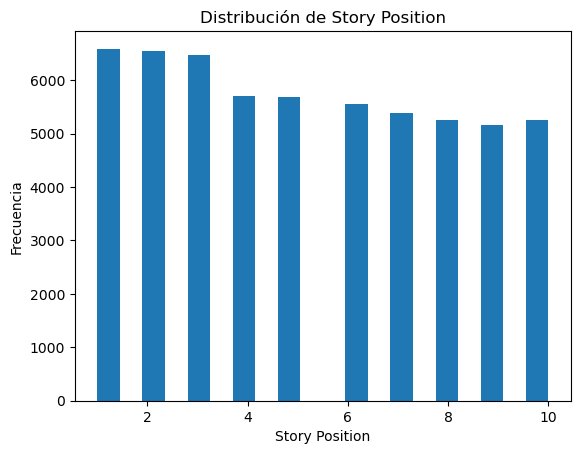

In [238]:
# Creación de un histograma('hist') a partir de la columna 'story_position' del dataframe 
df['story_position'].plot(kind='hist', bins=20)
# Creación y definición del título del plot
plt.title('Distribución de Story Position')
# Creación y definición de la etiqueta del eje X del plot
plt.xlabel('Story Position')
# Creación y definición de la etiqueta del eje Y del plot
plt.ylabel('Frecuencia')
# Visualización por pantalla del histogama
plt.show()

### 27- Convertir la columna "storydate" a formato datetime

In [239]:
df['storydate'] = pd.to_datetime(df['storydate'])
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position           float64
domain                    object
category                  object
dtype: object

### 28- Crear una nueva columna con el año de "storydate"

In [240]:
df['year'] = df['storydate'].dt.year
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown,2019
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown,2019
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown,2019
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown,2019
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown,2019
...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown,2019
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown,2019
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019


### 29- Crear una nueva columna con el mes de "storydate"

In [241]:
df['month'] = df['storydate'].dt.month
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year,month
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019,9


### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

In [242]:
cnn_json = df_cnn.to_json(orient='columns')
cnn_json

'{"title":{"16":"Bernie Sanders stays on the stump after receiving stitches for head wound","17":"Trump says he spoke with Putin about \'Russian hoax,\' didn\'t warn him \\nagainst 2020 election meddling","30":"McConnell will move to acquit Trump if he\'s impeached, not merely dismiss \\ncharges, 2 Republican senators say","61":"Here\'s what Sanford said about voting for Trump against a Democrat for 2020","103":"First on CNN: Respected foreign policy veteran joining Biden campaign","124":"Rosie O\'Donnell: Joe Biden should sit out 2020 election","128":"Buttigieg: \'I feel sorry for the President\' after he showed apparently \\naltered hurricane map","131":"Tim Ryan ends 2020 presidential campaign","133":"Why \'Betomania\' didn\'t translate to the national stage","180":"Eric Swalwell ends presidential bid after failing to gain traction","213":"Trump lashed out at Whitaker after explosive Cohen revelations","260":"Tim Ryan says Trump\'s suggestion to tie gun control legislation to \\nimm

### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

In [243]:
cnn_csv = df_cnn.to_csv('../data/cnn.csv', index=False)

### 32- Mostrar los artículos con la mayor "story_position" por fuente

In [244]:
idx = df.groupby('source')['story_position'].idxmax()
# Filtrado en df original
storypos_mayor_art = df.loc[idx]
storypos_mayor_art

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year,month
51317,The HillTrump boasts of bigger El Paso crowd t...,https://thehill.com/homenews/administration/42...,,1 hour ago,2019-02-12 00:00:00,Donald Trump,8,1.0,thehill.com,Unknown,2019,2
22585,"On Palestine-Israel, Cory Booker and Kamala Ha...",https://972mag.com/black-palestine-democratic-...,+972 Magazine,2 days ago,2019-04-28 12:00:00,Cory Booker,7,1.0,972mag.com,Unknown,2019,4
1700,Mayor de Blasio launches new resources for hom...,https://1010wins.radio.com/articles/mayor-de-b...,1010 Wins - Radio.com,2 days ago,2019-10-09 20:00:00,Bill de Blasio,10,2.0,1010wins.radio.com,Unknown,2019,10
10841,Starbucks CEO to appear Sept. 27 at the Univer...,https://www.1011now.com/content/news/Starbucks...,1011 News,1 hour ago,2019-09-24 16:00:00,Howard Schultz,2,10.0,www.1011now.com,Unknown,2019,9
14773,Starbucks CEO to appear Sept. 27 at the Univer...,https://www.1011now.com/content/news/Starbucks...,1011Now,11 hours ago,2019-09-25 02:00:00,Howard Schultz,2,10.0,www.1011now.com,Unknown,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10732,"In a unique gesture, presidential candidate Ma...",https://thegrio.com/2019/07/17/marianne-willia...,theGrio,22 hours ago,2019-07-18 08:00:00,Marianne Williamson,10,1.0,thegrio.com,Unknown,2019,7
45194,VIDEO EXCLUSIVE: Democratic 2020 Presidential ...,https://upolitics.com/videos/video-exclusive-d...,uPolitics,2 days ago,2019-06-06 18:00:00,Andrew Yang,9,1.0,upolitics.com,Unknown,2019,6
25289,Bernie Sanders’ spiritual supporter turns 2020...,https://vtdigger.org/2019/03/24/bernie-sanders...,vtdigger.org,22 hours ago,2019-03-25 12:00:00,Marianne Williamson,1,2.0,vtdigger.org,Unknown,2019,3
7599,Rep. Seth Moulton Calls For Democratic Majorit...,https://www.wgbh.org/news/national-news/2019/0...,wgbh.org,1 day ago,2019-01-05 06:00:00,Seth Moulton,1,1.0,www.wgbh.org,Unknown,2019,1


### 33- Calcular el resumen estadístico de la columna "story_position"

In [245]:
df_describe = df['story_position'].describe()
df_describe

count    57618.000000
mean         5.249627
std          2.889002
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: story_position, dtype: float64

### 34- Calcular el conteo de valores únicos en la columna "query"

In [246]:
query_unique_vals_num = df['query'].nunique()
query_unique_vals_num

30

### 35- Calcular o contar los valores faltantes de cada columna

In [247]:
missing_vals_count = df.isna().sum()
missing_vals_count

title              0
url                0
source             0
time               0
storydate          0
query              0
story_position     0
panel_position    33
domain             0
category           0
year               0
month              0
dtype: int64

### 36- Filtrar filas donde falta algún dato

In [248]:
rows_with_missing_data = df[df.isna().any(axis=1)]
print(rows_with_missing_data)

                                                   title  \
2006   Elizabeth Warren Adds Kirsten Gillibrand and K...   
2064   Cory Booker, Michael Bennet and John Delaney w...   
2274   Hickenlooper’s ethics hearing could be delayed...   
4231   Exclusive: Washington Gov. Jay Inslee has a me...   
7421   Senators Mitt Romney and Michael Bennet’s basi...   
7483   All but Castro and Delaney file signatures in ...   
8759   John Delaney Would Like You to Know He’s Still...   
10017  Bennet slams Democratic National Committee ove...   
12287  Bennet slams Democratic National Committee ove...   
13879                     Opinion | Impeach Donald Trump   
13944  Wayne Messam suspends his Democratic primary c...   
16376  Ivanka Trump hosting bipartisan paid leave sum...   
19233  Mitt Romney Teams with Democrat Michael Bennet...   
20327  John Delaney, 2020 dark horse, posts intense w...   
21381  Mitt Romney Teams with Democrat Michael Bennet...   
23792  Gillibrand calls for full funding

### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

In [249]:
df_category = pd.DataFrame(df['category'])
df_category

,category
0,Unknown
1,Unknown
2,Unknown
3,Unknown
4,Unknown
...,...
57613,Unknown
57614,Unknown
57615,Unknown
57616,Unknown


In [250]:
df = df.drop(columns=['category'])
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,year,month
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,2019,5
...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,2019,9


### 38- Filtrar filas donde la columna 'source' está vacía o es nula

In [251]:
missing_source_vals = df[df['source'].isna() | (df['source'] == '')]
missing_source_vals

,title,url,source,time,storydate,query,story_position,panel_position,domain,year,month
51317,The HillTrump boasts of bigger El Paso crowd t...,https://thehill.com/homenews/administration/42...,,1 hour ago,2019-02-12,Donald Trump,8,1.0,thehill.com,2019,2
53805,Huffington PostBeto O'Rourke Positions Himself...,https://www.huffingtonpost.com/entry/beto-orou...,,1 hour ago,2019-02-12,Donald Trump,1,1.0,www.huffingtonpost.com,2019,2


### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

In [252]:
# A) En un paso:
df = df.drop(index=(df[df['source'].isna() | (df['source'] == '')].index))
df

# A.2) En dos pasos:
#   index_to_drop = df[df['source'].isna() & (df['source'] == '')].index
#   df = df.drop(index=index_to_drop)

# B) Con máscara:
#   mask = ~df['source'].isna() & (df['source'] != '')
#   df = df[mask]


,title,url,source,time,storydate,query,story_position,panel_position,domain,year,month
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,2019,5
...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,2019,9


### 40- Calcular la media de la columna story_position para cada query

In [257]:
query_mean_storypos = df.groupby('query')['story_position'].mean()
query_mean_storypos

query
Amy Klobuchar          5.485017
Andrew Yang            5.477004
Bernie Sanders         5.456418
Beto O Rourke          5.403399
Bill Weld              4.728591
Bill de Blasio         5.513235
Cory Booker            5.460512
Deval Patrick          5.191441
Donald Trump           5.485566
Elizabeth Warren       5.482407
Eric Swalwell          5.214198
Howard Schultz         4.776099
Jay Inslee             4.954359
Joe Biden              5.424632
John Delaney           4.452242
John Hickenlooper      4.911681
Julian Castro          5.374422
Kamala Harris          5.484781
Kirsten Gillibrand     5.284419
Marianne Williamson    5.144767
Michael Bennet         4.760052
Michael Bloomberg      4.865504
Mike Gravel            4.976323
Pete Buttigieg         5.392045
Seth Moulton           4.917058
Steve Bullock          5.042918
Tim Ryan               4.932613
Tom Steyer             5.032000
Tulsi Gabbard          5.509031
Wayne Messam           3.119266
Name: story_position, dtype: float